###### Student: Tse Ka-man
###### Student ID: Not applicable
###### Course code: PATH6700
###### Course name: Recent Advances in Cancer Biology

### Discuss the Roles of Immunohistochemistry in Human Cancer Diagnosis and Management

In [1]:
from bioservices.kegg import KEGG
from collections import deque
import pandas as pd
import networkx as nx
from tqdm import tqdm
import time
import KEGGparser as kg
import matplotlib.pyplot as plt
%matplotlib inline

#### Comparison of Cholangiocarcinoma with other related cancers 

In [2]:
relevant_cancers = ['H00048', 'H02302', 'H01557', 'H00046', 'H00047', 'H00019', 'H00045']

In [24]:
for ids in relevant_cancers:
    print(ids, kg.get_hsa_name(ids)[0])

H00048 Hepatocellular carcinoma;
H02302 Hepatoblastoma
H01557 Hepatic angiosarcoma
H00046 Cholangiocarcinoma
H00047 Gallbladder cancer
H00019 Pancreatic cancer
H00045 Pancreatic neuroendocrine tumor


In [11]:
%%time
pool = [] # retrieve genes in related to respective cancer
for ids in relevant_cancers:    
    dict_data = kg.parse(ids)
    name = dict_data['NAME'][0]
    if 'GENE' in dict_data.keys():
        for key, value in dict_data['GENE'].items():
            pool.append([ids, name, key, value])
    else:
        pool.append([ids, name, "null", "null"])

CPU times: user 52.3 ms, sys: 12.6 ms, total: 64.9 ms
Wall time: 3.53 s


In [12]:
%%time
g = nx.Graph()
for entry in pool:
    head = entry[0]
    head_name = entry[1]
    tail = entry[2]
    tail_name = entry[3]
    g.add_node(head, name=head_name, weight=1)
    g.add_node(tail, name=tail_name, weight=1)
    g.add_edge(head, tail, weight=1)

CPU times: user 605 µs, sys: 1e+03 ns, total: 606 µs
Wall time: 613 µs


In [158]:
def plot_network(graph):
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color='r')
    nx.draw_networkx_labels(graph, pos, font_size = 18)
    nx.draw_networkx_edges(graph, pos, edge_color='b')
    plt.show()

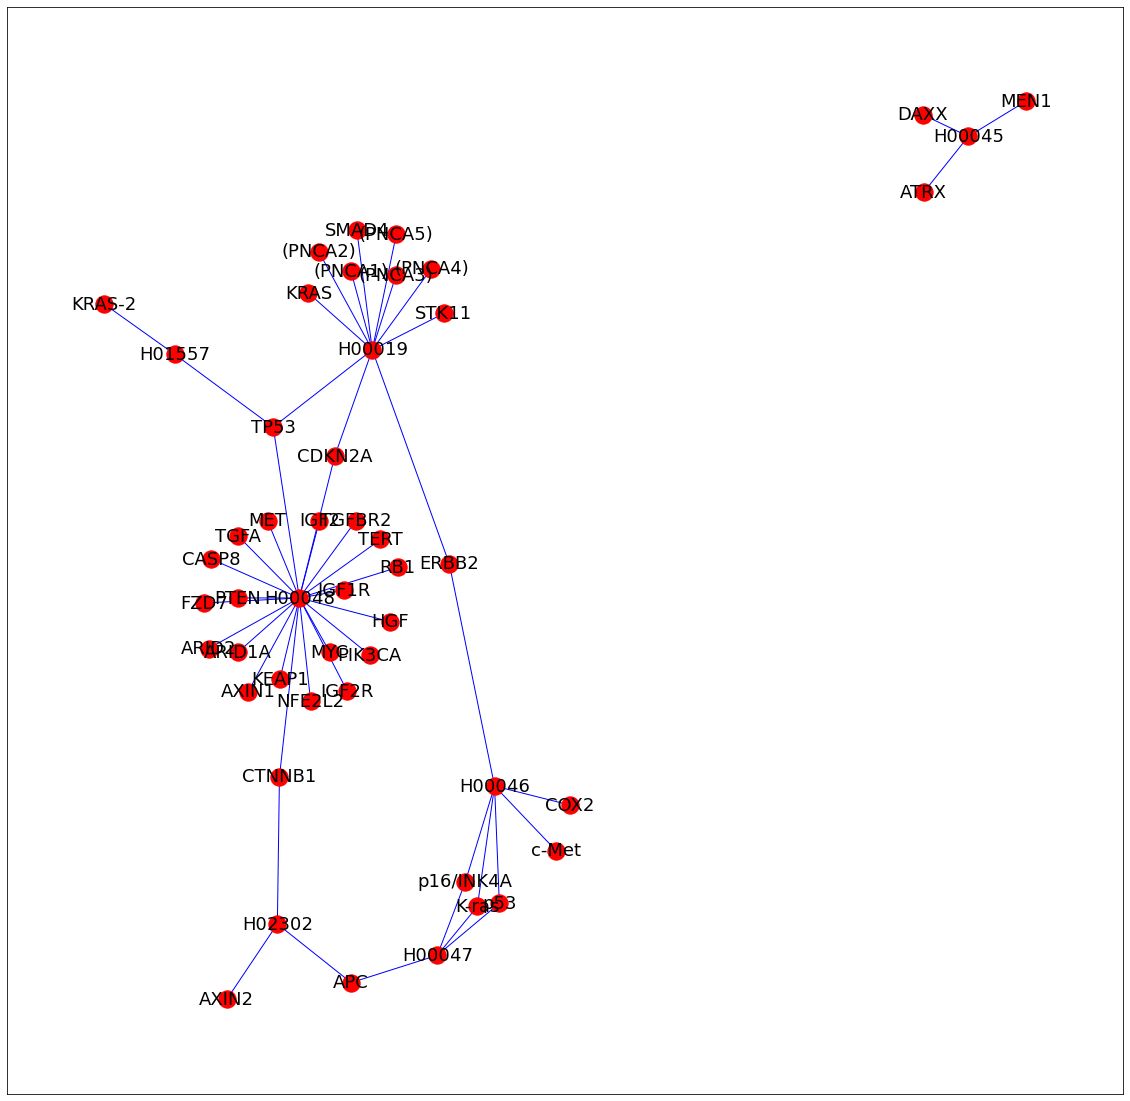

In [159]:
plot_network(g)

In [21]:
name = nx.get_node_attributes(g,'name')

In [32]:
# See if cholangiocarcinoma shares any genetic profile with other related cancer type
for j in ['H00048', 'H02302', 'H01557', 'H00047', 'H00019', 'H00045']:
    if nx.has_path(g, source='H00046', target=j):
        print ('H00046 Cholangiocarcinoma share connection with', j, name[j])
    else:
        print ('H00046 Cholangiocarcinoma does NOT share any connection with', j, name[j])

H00046 Cholangiocarcinoma share connection with H00048 Hepatocellular carcinoma;
H00046 Cholangiocarcinoma share connection with H02302 Hepatoblastoma
H00046 Cholangiocarcinoma share connection with H01557 Hepatic angiosarcoma
H00046 Cholangiocarcinoma share connection with H00047 Gallbladder cancer
H00046 Cholangiocarcinoma share connection with H00019 Pancreatic cancer
H00046 Cholangiocarcinoma does NOT share any connection with H00045 Pancreatic neuroendocrine tumor


In [58]:
shared_cancers = ['H00048', 'H02302', 'H01557', 'H00047', 'H00019']

In [67]:
cholangiocarcinoma_neighbours = g.neighbors('H00046')
cholangiocarcinoma_genes = []
for n in cholangiocarcinoma_neighbours:
    cholangiocarcinoma_genes.append(n)
cholangiocarcinoma_genes

['K-ras', 'p53', 'c-Met', 'ERBB2', 'p16/INK4A', 'COX2']

In [48]:
other_cancer_neighbours = []
for entry in shared_cancers:
    neighbours = g.neighbors(entry)
    for n in neighbours:
        other_cancer_neighbours.append(n)
gene_set_from_other_cancers = list((set(other_cancer_neighbours)))

In [49]:
print(gene_set_from_other_cancers)

['MYC', 'KEAP1', 'TP53', 'KRAS-2', 'TERT', 'K-ras', '(PNCA5)', 'IGF1R', 'HGF', 'TGFA', 'STK11', 'IGF2', 'PIK3CA', '(PNCA1)', 'CASP8', 'AXIN1', 'ERBB2', 'SMAD4', 'RB1', 'ARID1A', '(PNCA4)', 'FZD7', 'MET', 'CTNNB1', 'TGFBR2', 'AXIN2', 'PTEN', 'ARID2', 'NFE2L2', '(PNCA3)', 'KRAS', 'CDKN2A', 'p53', '(PNCA2)', 'IGF2R', 'APC', 'p16/INK4A']


In [62]:
from difflib import SequenceMatcher
def similar(a, b):
    """ The basic idea is to find the longest contiguous matching
    subsequence (LCS) that contains no “junk” elements. 
    This does not yield minimal edit sequences, but does tend 
    to yield matches that “look right” to people.
    """
    return round(SequenceMatcher(None, a, b).ratio(), 4)

In [137]:
shared_genes = []
print ('------------------ Shared Genes ------------------')
for i in cholangiocarcinoma_genes:
    for j in gene_set_from_other_cancers:
        if similar(i,j)>0.8:
            print('Cholangiocarcinoma has',i,'shared with other cancer')
            shared_genes.append(j)

difference = set(cholangiocarcinoma_genes).difference(set(shared_genes))
print()
print ('------------------ Unique Genes ------------------')
print('Cholangiocarcinoma has', difference, 'different from other cancers')

------------------ Shared Genes ------------------
Cholangiocarcinoma has K-ras shared with other cancer
Cholangiocarcinoma has p53 shared with other cancer
Cholangiocarcinoma has ERBB2 shared with other cancer
Cholangiocarcinoma has p16/INK4A shared with other cancer

------------------ Unique Genes ------------------
Cholangiocarcinoma has {'COX2', 'c-Met'} different from other cancers


In [4]:
# Reference URL: https://www.kegg.jp/entry/hsa:5743
# Reference URL: https://www.kegg.jp/entry/hsa:4233
gene_dict = {'5743': ['PTGS2', 'COX-2', 'COX2', 'GRIPGHS', 'PGG/HS', 'PGHS-2', 'PHS-2', 'hCox-2'],
           '4233': ['MET', 'AUTS9', 'DFNB97', 'HGFR', 'RCCP2', 'c-Met']}

#### Signalling pathways affected by the COX2 and c-MET mutations

In [5]:
# COX: https://www.genome.jp/entry/hsa:5743
# MET: https://www.genome.jp/entry/hsa:4233
COX_networks = {'N00317':'AhR signaling pathway', 
                'N00402':'HCMV US28 to GNAQ-PLCB/G-calcineurin signaling pathway'}
MET_networks = {'N00005':'Mutation-activated MET to RAS-ERK signaling pathway',
                'N00043':'HGF-MET-PI3K signaling pathway',
                'N00044':'Mutation-activated MET to PI3K signaling pathway',
                'N00143':'ASPL-TFE3 fusion to transcriptional activation',
                'N00216':'HGF-MET-RAS-ERK signaling pathway',
                'N00246':'HGF-overexpression to RAS-ERK signaling pathway',
                'N00247':'HGF-overexpression to PI3K signaling pathway',
                'N00248':'MET-overexpression to RAS-ERK signaling pathway',
                'N00249':'MET-overexpression to PI3K signaling pathway',
                'N00259':'Amplified MET to RAS-ERK signaling pathway',
                'N00260':'Amplified MET to PI3K signaling pathway',
                'N01062':'Mutation-activated MET to RAS-ERK signaling pathway',
                'N01063':'Mutation-activated MET to PI3K signaling pathway',
                'N10024':'Tyrosine kinase inhibitor to MET exon 14 skipping'}
joint = COX_networks | MET_networks

In [6]:
definition = {}
for ids in joint:
    definition[ids] = kg.get_network_definition(ids)

WARNING [bioservices:keggparser:119]:  Found keyword METABOLITE, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (N00317                      Network) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:119]:  Found keyword PERTURBANT, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (N00402                      Network) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:119]:  Found keyword METABOLITE, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (N00402                      Network) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:119]:  Found keyword VARIANT, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (N00005                      Network) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:119

In [7]:
count = 1
for key, value in definition.items():
    name = joint[key]
    for gene in gene_dict.keys():
        if gene in value[1]:
            print ('-------------- Chain of Signalling no. %i --------------' %count)
            print (key, name)
            print (value[0])
            print ()
            count+=1

-------------- Chain of Signalling no. 1 --------------
N00317 AhR signaling pathway
KA -> (AHR+ARNT) => (IL6,IL22,PTGS2,VEGFA,CYP1A1,CYP1B1)

-------------- Chain of Signalling no. 2 --------------
N00402 HCMV US28 to GNAQ-PLCB/G-calcineurin signaling pathway
US28 -> GNAQ -> PLCB -> IP3 -> Ca2+ -> CALM -- CN -> NFAT => (CXCL8,PTGS2)

-------------- Chain of Signalling no. 3 --------------
N00005 Mutation-activated MET to RAS-ERK signaling pathway
MET* -> GRB2 -> SOS -> RAS -> RAF -> MEK -> ERK -> CCND1

-------------- Chain of Signalling no. 4 --------------
N00043 HGF-MET-PI3K signaling pathway
HGF -> MET -> GAB1 -> PI3K -> PIP3 -> AKT -| BAD

-------------- Chain of Signalling no. 5 --------------
N00044 Mutation-activated MET to PI3K signaling pathway
MET* -> GAB1 -> PI3K -> PIP3 -> AKT -| BAD

-------------- Chain of Signalling no. 6 --------------
N00143 ASPL-TFE3 fusion to transcriptional activation
ASPL-TFE3 => MET

-------------- Chain of Signalling no. 7 --------------
N00216

In [8]:
# KEGG's Pathway in Cancer: https://www.kegg.jp/pathway/hsa05200
pathway_in_cancer = {'nt06210 ERK signaling': ['N00001 EGF-EGFR-RAS-ERK signaling pathway','N00229 TGFA-EGFR-RAS-ERK signaling pathway',
                                                'N00021 EGF-ERBB2-RAS-ERK signaling pathway','N00015 PDGF-PDGFR-RAS-ERK signaling pathway',
                                                'N00215 KITLG-KIT-RAS-ERK signaling pathway','N00019 FGF-FGFR-RAS-ERK signaling pathway',
                                                'N00217 FLT3LG-FLT3-RAS-ERK signaling pathway','N00233 IGF-IGF1R-RAS-ERK signaling pathway',
                                                'N00216 HGF-MET-RAS-ERK signaling pathway'],
                    'nt06214 PI3K signaling': ['N00033 EGF-EGFR-PI3K signaling pathway','N00231 TGFA-EGFR-PI3K signaling pathway',
                                               'N00039 PDGF-PDGFR-PI3K signaling pathway','N00045 KITLG-KIT-PI3K signaling pathway',
                                               'N00037 FGF-FGFR-PI3K signaling pathway','N00234 IGF2-IGF1R-PI3K signaling pathway',
                                               'N00043 HGF-MET-PI3K signaling pathway','N00220 PTEN-PIP3-AKT signaling pathway',
                                               'N00218 FLT3LG-FLT3-RAS-PI3K signaling pathway'],
                    'nt06213 Other RAS signaling':['N00096 EGF-EGFR-RAS-RASSF1 signaling pathway','N00103 EGF-EGFR-RAS-RalGDS signaling pathway'],
                    'nt06215 WNT signaling':['N00056 Wnt signaling pathway'],
                    'nt06216 NOTCH signaling':['N00086 Notch signaling pathway'],
                    'nt06217 HH signaling':['N00062 Hedgehog signaling pathway'],
                    'nt06218 TGFB signaling':['N00063 TGF-beta signaling pathway'],
                    'nt06219 JAK-STAT signaling':['N00053 Cytokine-Jak-STAT signaling pathway','N00094 EGF-Jak-STAT signaling pathway',
                                                  'N00219 FLT3LG-FLT3-STAT5 signaling pathway'],
                    'nt06220 Calcium signaling':['N00026 EGF-EGFR-PLCG-CAMK signaling pathway','N00028 PDGF-PDGFR-PLCG-CAMK signaling pathway',
                                                 'N00227 TGFA-EGFR-PLCG-PKC signaling pathway'],
                    'nt06225 HIF-1 signaling':['N00079 HIF-1 signaling pathway'],
                    'nt06226 KEAP1-NRF2 signaling':['N00243 KEAP1-NRF2 signaling pathway'],
                    'nt06227 Nuclear receptor signaling':['N00083 Androgen receptor signaling pathway'],
                    'nt06230 Cell cycle':['N00066 MDM2-p21-Cell cycle G1/S','N00069 p16-Cell cycle G1/S',
                                          'N00090 p15-Cell cycle G1/S','N00091 p27-Cell cycle G1/S'],
                    'nt06231 Apoptosis':['N00098 Intrinsic apoptotic pathway','N00101 DCC-apoptotic pathway'],
                    'nt06232 Telomerase activity':['N00239 Telomerase activity']}

count = 0
for value in pathway_in_cancer.values():
    count +=len(value)
print (count)

for entry in definition.keys():
    for key, value in pathway_in_cancer.items():
        for v in value:
            if entry in v:
                print(key, v)

40
nt06214 PI3K signaling N00043 HGF-MET-PI3K signaling pathway
nt06210 ERK signaling N00216 HGF-MET-RAS-ERK signaling pathway


In [9]:
len(pathway_in_cancer['nt06214 PI3K signaling']), len(pathway_in_cancer['nt06210 ERK signaling'])

(9, 9)

From above, it's obvious MET is an upstream effector at over 14 signalling pathways while COX2 is a product so far down the 2 pathways it's in.  Even drugs Capmatinib and Tepotinib are designed to suppress the overexpressed MET, it's not effective enough as there are another 8 pathways from respective PI3K signalling and ERK signalling pathway which will take up the role to generate downstream signals.  It's hard to differentiate cholangiocarcinoma from other type of cancers if other cancers also show abnormal high level of metabolites from those pathways under the same class.

On the other hand, COX2 only shows up in two distinct signalling pathways as a downstream product that do not share by other cancers. So, COX2 is more likely to be a clear signal that the cancer is indeed cholangiocarcinoma.


#### COX2 and Cholangiocarcinoma - Literature Review

In [ ]:
# Abstracts extracted from following pubmed publications
pubmedIds = ['33617828', '33456518', '32454418', '31492557', '31341363', 
             '30753687', '30402042', '30233800', '29872269', '29725387', 
             '28789463', '28728977', '27563447', '27418285', '26960307', 
             '26718397', '26691190', '26518876', '26276523', '26188043', 
             '26125824', '26058972', '24839005', '24699315', '24360936', 
             '23922859', '23900502', '23645518', '23608225', '23494562', 
             '23362950', '23260331', '22851165', '22186974']

In [1]:
with open('PTGS2_cholangiocarcinoma_pubmed_abstract.txt','r') as f:
    para = f.readlines()
    for p in para:
        print (p)

Cholangiocarcinoma (CCA) is a malignant biliary tract epithelium tumor. The programmed death-1 (PD-1)/programmed receptor-ligand 1 (PD-L1) signaling pathway has been implicated as an immune escape mechanism in several cancers. The present study aimed to assess the expression of PD-L1 on human CCA cell lines and its potential role in suppressing CD8(+) T- cell function. A panel of intrahepatic CCA cell lines was evaluated for immune regulatory checkpoint ligands and inflammation markers. Effects of pro-inflammatory cytokine, interferon gamma (IFN-gamma), on the expression of immune regulatory checkpoint ligands and inflammation markers were determined. The PD-L1 function was measured by co-culturing CCA cells with lymphocytes. Most of the selected Thai CCA cell lines, including HuCCA-1, RMCCA-1, KKU-100, and KKU-213, expressed higher PD-L1 than normal cholangiocyte MMNK-1 and ANK-1 cells. Both PD-L1 and cyclooxygenase-2 (COX-2) expressions were highest in HuCCA-1 cells. A 48 h treatment